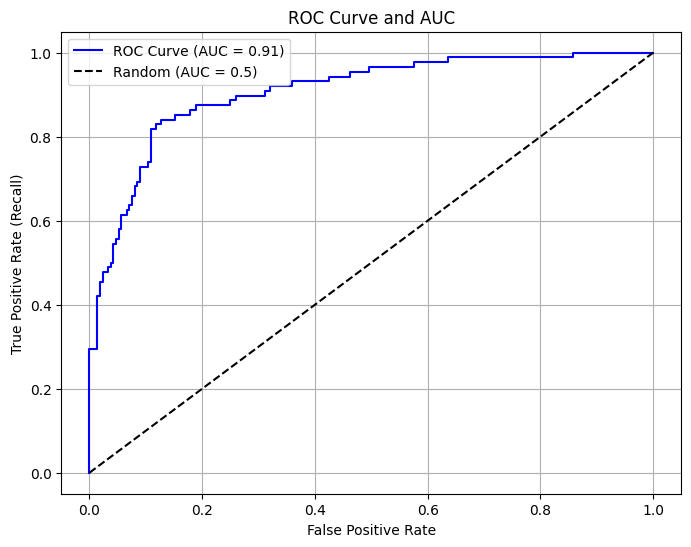

In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 데이터 생성
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.7, 0.3], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 모델 훈련
model = LogisticRegression()
model.fit(X_train, y_train)

# 확률 예측
y_proba = model.predict_proba(X_test)[:, 1]  # 1일 확률만 추출

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve and AUC')
plt.legend()
plt.grid(True)
plt.show()
